In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib notebook

In [2]:
df = pd.read_csv("https://github.com/MinCiencia/Datos-COVID19/blob/master/output/producto1/Covid-19.csv?raw=true")

In [3]:
df = df[(df['Comuna'] == 'Las Condes')]


In [4]:
df

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,2020-03-30,2020-04-01,2020-04-03,2020-04-06,2020-04-08,...,2021-11-08,2021-11-12,2021-11-15,2021-11-19,2021-11-22,2021-11-26,2021-11-29,2021-12-03,2021-12-06,Tasa
108,Metropolitana,13,Las Condes,13114.0,330759.0,181.0,208.0,224.0,258.0,266.0,...,21589.0,21754.0,21847.0,21967.0,22028.0,22122.0,22160.0,22193.0,22214.0,6716.1


In [5]:
df.shape

(1, 185)

In [6]:
df = df.drop(['Region','Codigo region','Codigo comuna','Poblacion','Comuna','Tasa'], axis=1)
df = df.melt()
df = df.rename(columns={'variable':'Fecha', 'value': 'Casos Incremental'})
df['Fecha'] = pd.to_datetime(df['Fecha'])
# df = df.resample('W', on='Fecha').sum().reset_index() # Convirtiendo a casos semanales.

In [7]:
df

,Fecha,Casos Incremental
0,2020-03-30,181.0
1,2020-04-01,208.0
2,2020-04-03,224.0
3,2020-04-06,258.0
4,2020-04-08,266.0
...,...,...
174,2021-11-22,22028.0
175,2021-11-26,22122.0
176,2021-11-29,22160.0
177,2021-12-03,22193.0


In [8]:
df['Casos'] = df['Casos Incremental'] - df['Casos Incremental'].shift()
df = df.dropna()


In [9]:
df

,Fecha,Casos Incremental,Casos
1,2020-04-01,208.0,27.0
2,2020-04-03,224.0,16.0
3,2020-04-06,258.0,34.0
4,2020-04-08,266.0,8.0
5,2020-04-10,281.0,15.0
...,...,...,...
174,2021-11-22,22028.0,61.0
175,2021-11-26,22122.0,94.0
176,2021-11-29,22160.0,38.0
177,2021-12-03,22193.0,33.0


<IPython.core.display.Javascript object>


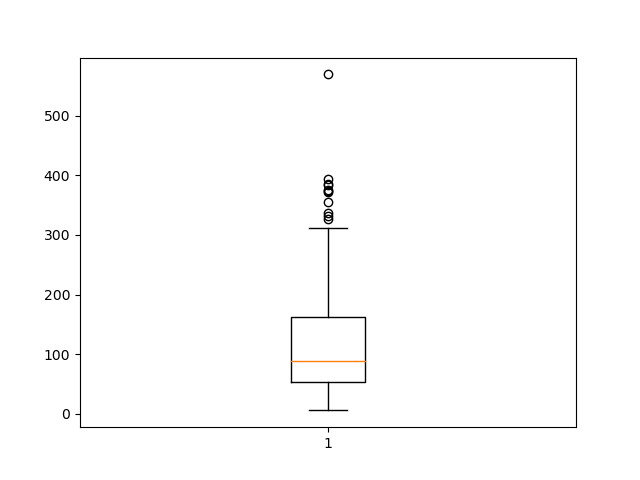

{'whiskers': [<matplotlib.lines.Line2D at 0x28cdf882880>,
 'caps': [<matplotlib.lines.Line2D at 0x28cdf882ee0>,
 'boxes': [<matplotlib.lines.Line2D at 0x28cdf882430>],
 'medians': [<matplotlib.lines.Line2D at 0x28cdf89a640>],
 'fliers': [<matplotlib.lines.Line2D at 0x28cdf89aa00>],
 'means': []}

In [10]:
x=df['Casos']

plt.boxplot(x)


In [11]:
df.describe()

,Casos Incremental,Casos
count,178.000000,178.000000
mean,11037.033708,123.780899
std,6733.985623,99.623145
min,208.000000,6.000000
25%,6137.000000,54.250000
50%,9454.000000,89.500000
75%,18343.000000,162.000000
max,22214.000000,569.000000


In [13]:
min_thresold, max_thresold = df['Casos'].quantile([0.001, 0.999])
min_thresold, max_thresold

(6.354, 538.0250000000013)

In [14]:
df[df.Casos < min_thresold]

,Fecha,Casos Incremental,Casos
9,2020-04-20,326.0,6.0


In [15]:
df[df.Casos > max_thresold]

,Fecha,Casos Incremental,Casos
26,2020-06-19,4192.0,569.0


Como podemos ver uno de los outliers es el valor correspondiente a 569, se puede notar de manera visual a traves del grafico "Boxplot" y tambien con el analisis de los percentiles. 